<a href="https://colab.research.google.com/github/verzah/IntroToMachineLearning/blob/main/Linear_Regression_and_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Practice
Gavin Brumfield

#Install dependencies.
For this project I chose to utilize Numpy, Pandas, MatPlotLib, Seaborn, and Scikit-learn.

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

#Import dependencies and reading in 'housing.csv'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")

#Clean data of null values.
In order to provide higher accuracy I chose to remove the null values and then resave the file.

In [ ]:
data.dropna(inplace=True)

# Import sklearn train_test_split and define X and Y.
X contains the data without column 'median_house_value' and Y contains only 'median_house_value'. This is so you can train the model to predict median_house_value.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

#Define train_test_split and X_train, X_test, Y_train, Y_test variables
test_size=0.2 (20% of the data will be used for testing) Oftentimes, a test_size value of 0.2 is best, so I have used it for this instance.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Combine training data into train_data.

In [ ]:
train_data = X_train.join(Y_train)

# Display histogram of the variables.
Note that total_rooms, total_bedrooms, population, households are all skewed right.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

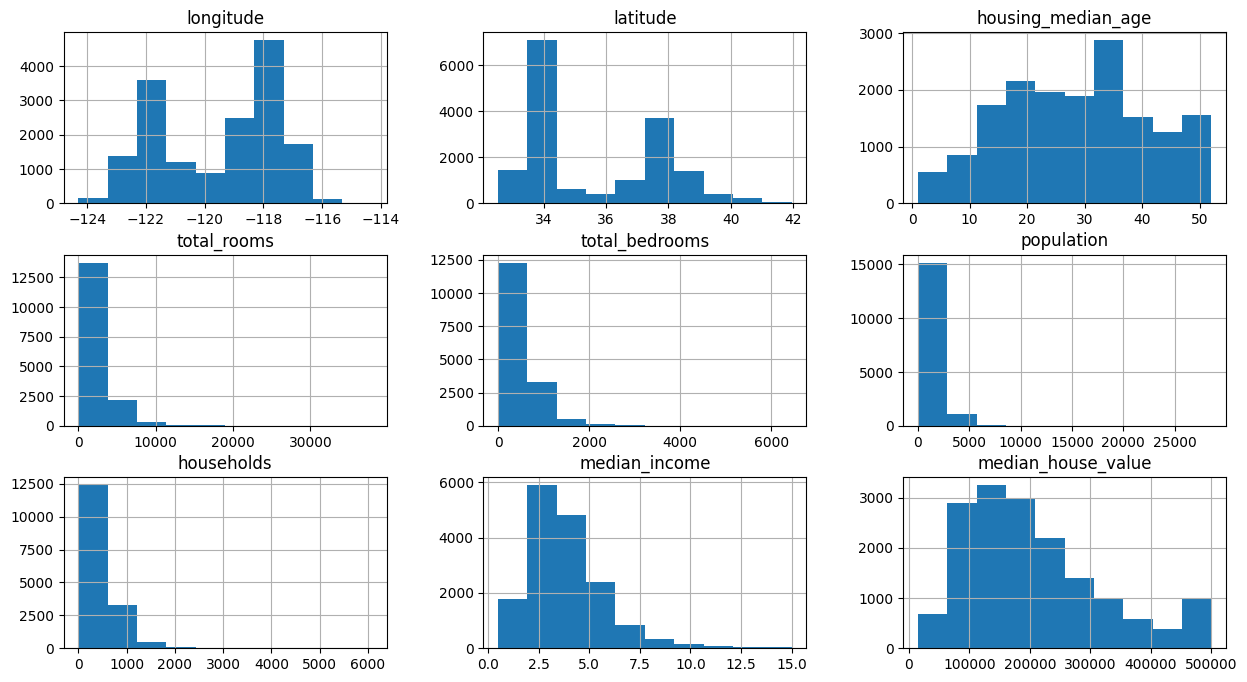

In [ ]:
train_data.hist(figsize=(15,8))

#Take the log of skewed data using np.log.
I did this to put the data into log normal distribution.

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

#Display histograms after adjusting for skewed data.
Notice how these variables now produce a Gaussian curve.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

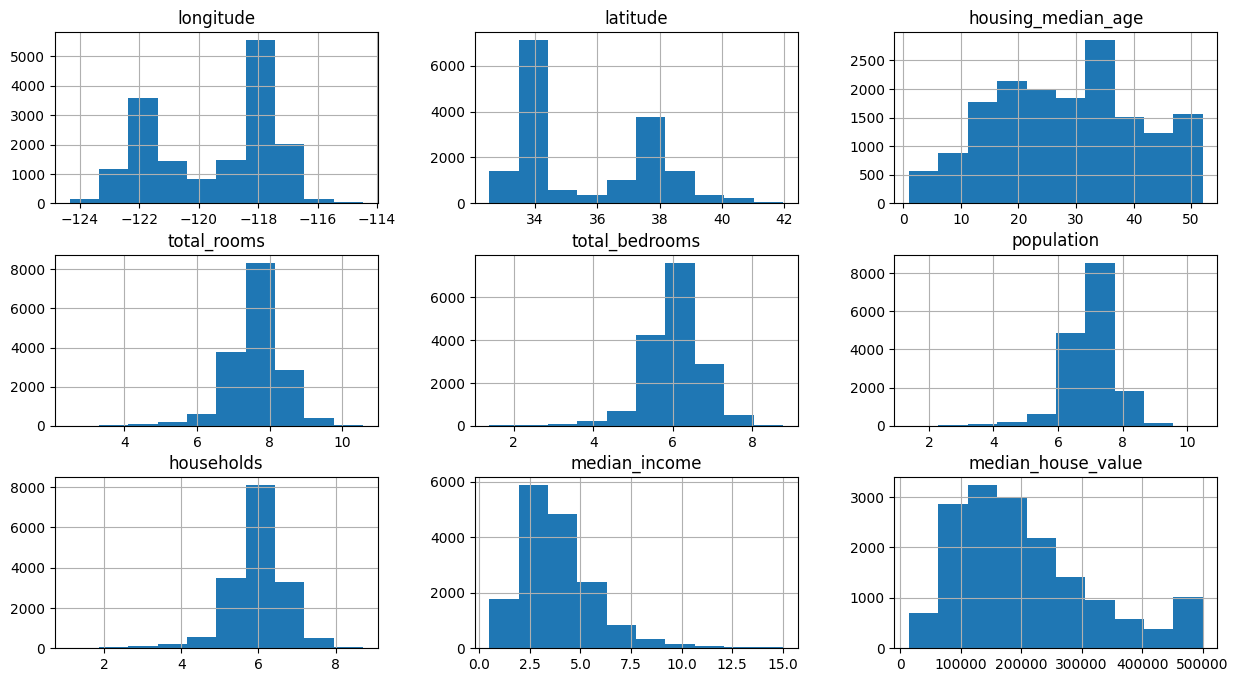

In [ ]:
train_data.hist(figsize=(15,8))

# Convert categorical variables to binary.
Ocean proximity likely affects housing prices. Everyone likes living closer to the beach and is therefore willing to pay more and likewise the population density is higher so there are more homes.

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

#Display correlation heatmap.
Note that median_income and median_house_value have strong correlation. Several other variables have strong correlation as well such as, population:total_room (.87), population:households (.97), inland:median_house_value (-.61), median_income:median_house_value (.69), median_income:inland (-.24).

<Axes: >

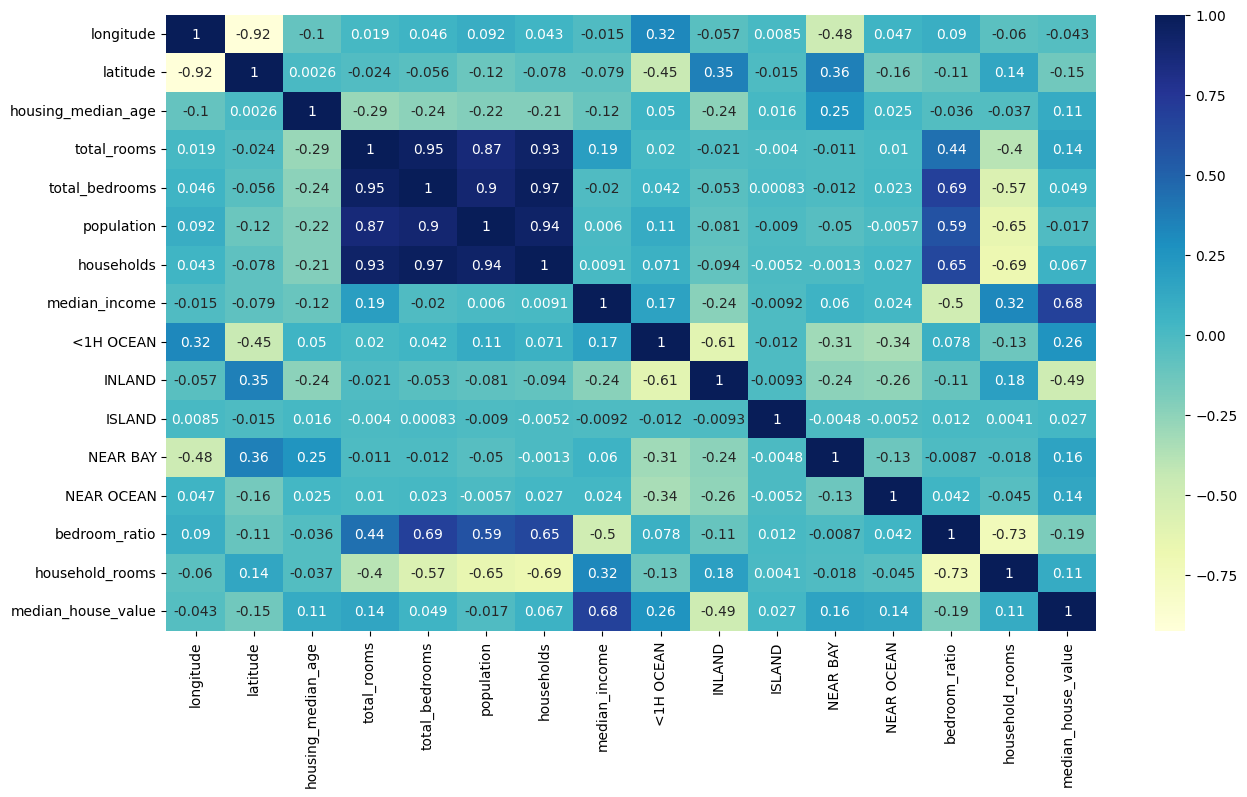

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Display scatterplot to investigate ocean proximity from longitude and latitude.
Values in red are closer to the coast and values in blue are further away.
Notice how the scatterplot resembles a map of california. Potentially this could be overlayed on a satellite image.

<Axes: xlabel='latitude', ylabel='longitude'>

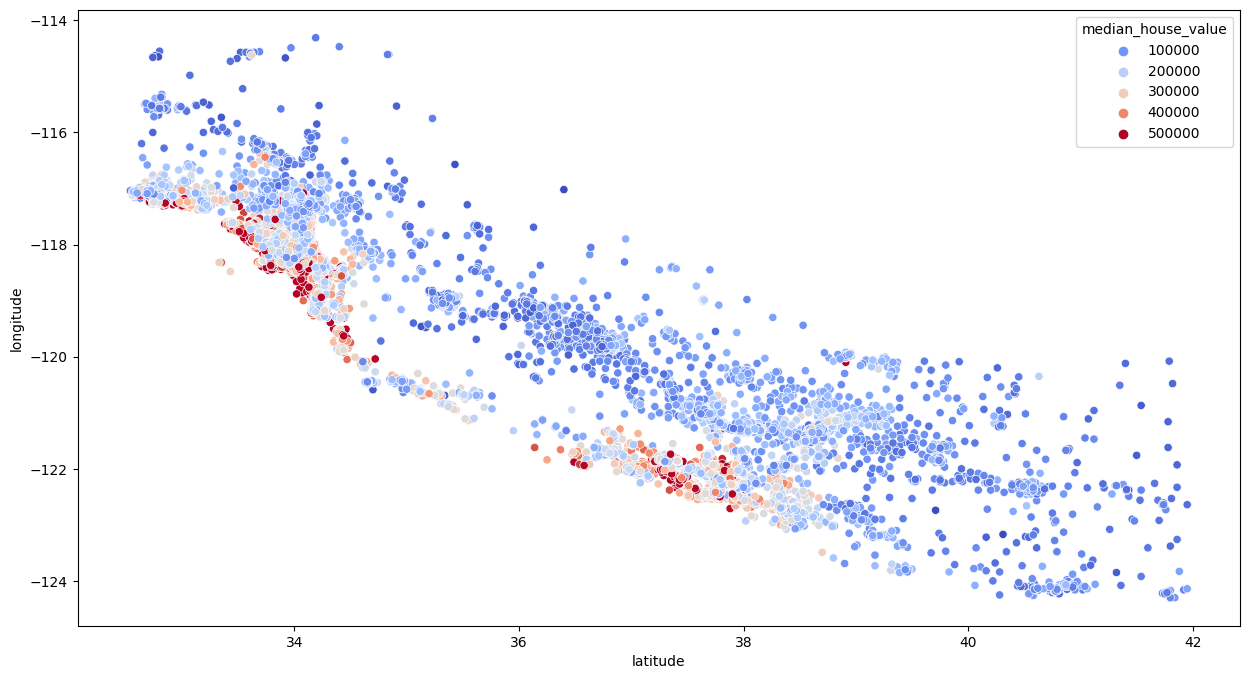

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette="coolwarm")

# Create two new variables, bedroom_ratio and household_rooms.
I was also interested in the ratio between bedrooms and rooms in a house as an additional variable.



In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

#Heatmap once again, including bedroom_ratio and household_rooms.

If you look closely you can see that household_rooms positively correlates with median_income and negatively correlates with population. This makes sense as the more income you have the more house you can afford and the bigger the population in an area the more rooms need to be included to accomodate.

<Axes: >

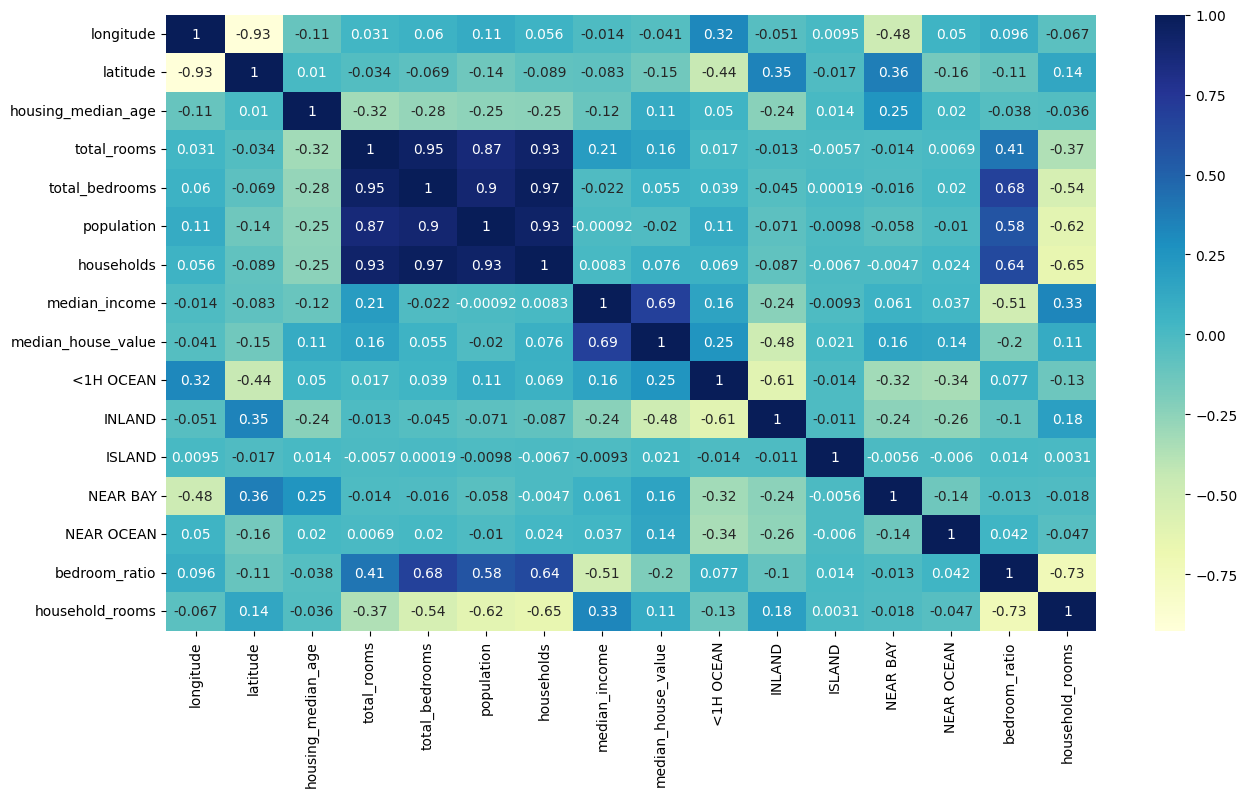

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#Start linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

#Take the log of skewed data using npm.log.
In order to put this data into log normal distribution.

In [ ]:
train_data = X_train.join(Y_train)

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

#Calculate regression score.

In [ ]:
reg.score(X_train_s, Y_train)

0.6706728550582332

#Create test_data.

In [ ]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] /  test_data['households']




In [ ]:
X_test, Y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']


In [ ]:
X_test_s = scaler.transform(X_test)

#Calculate test regression score.

In [ ]:
reg.score(X_test_s, Y_test)

0.6719321841744919

#Start random forest, also utilizing scaling now.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, Y_test)

0.8255819239589631

#Implement parameter gridsearch to find best estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[30, 50, 100],
    "max_features":[8, 12, 20],
    "min_samples_split":[2, 4, 6, 8]

}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

#Display best estimator and define as best_forest.

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8)

In [ ]:
best_forest = grid_search.best_estimator_

#Run random forest with best_forest.

In [ ]:
best_forest.score(X_test_s, Y_test)

0.8261377934887586